In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import auc

Successfully generated plots.


<Figure size 236.22x314.961 with 0 Axes>

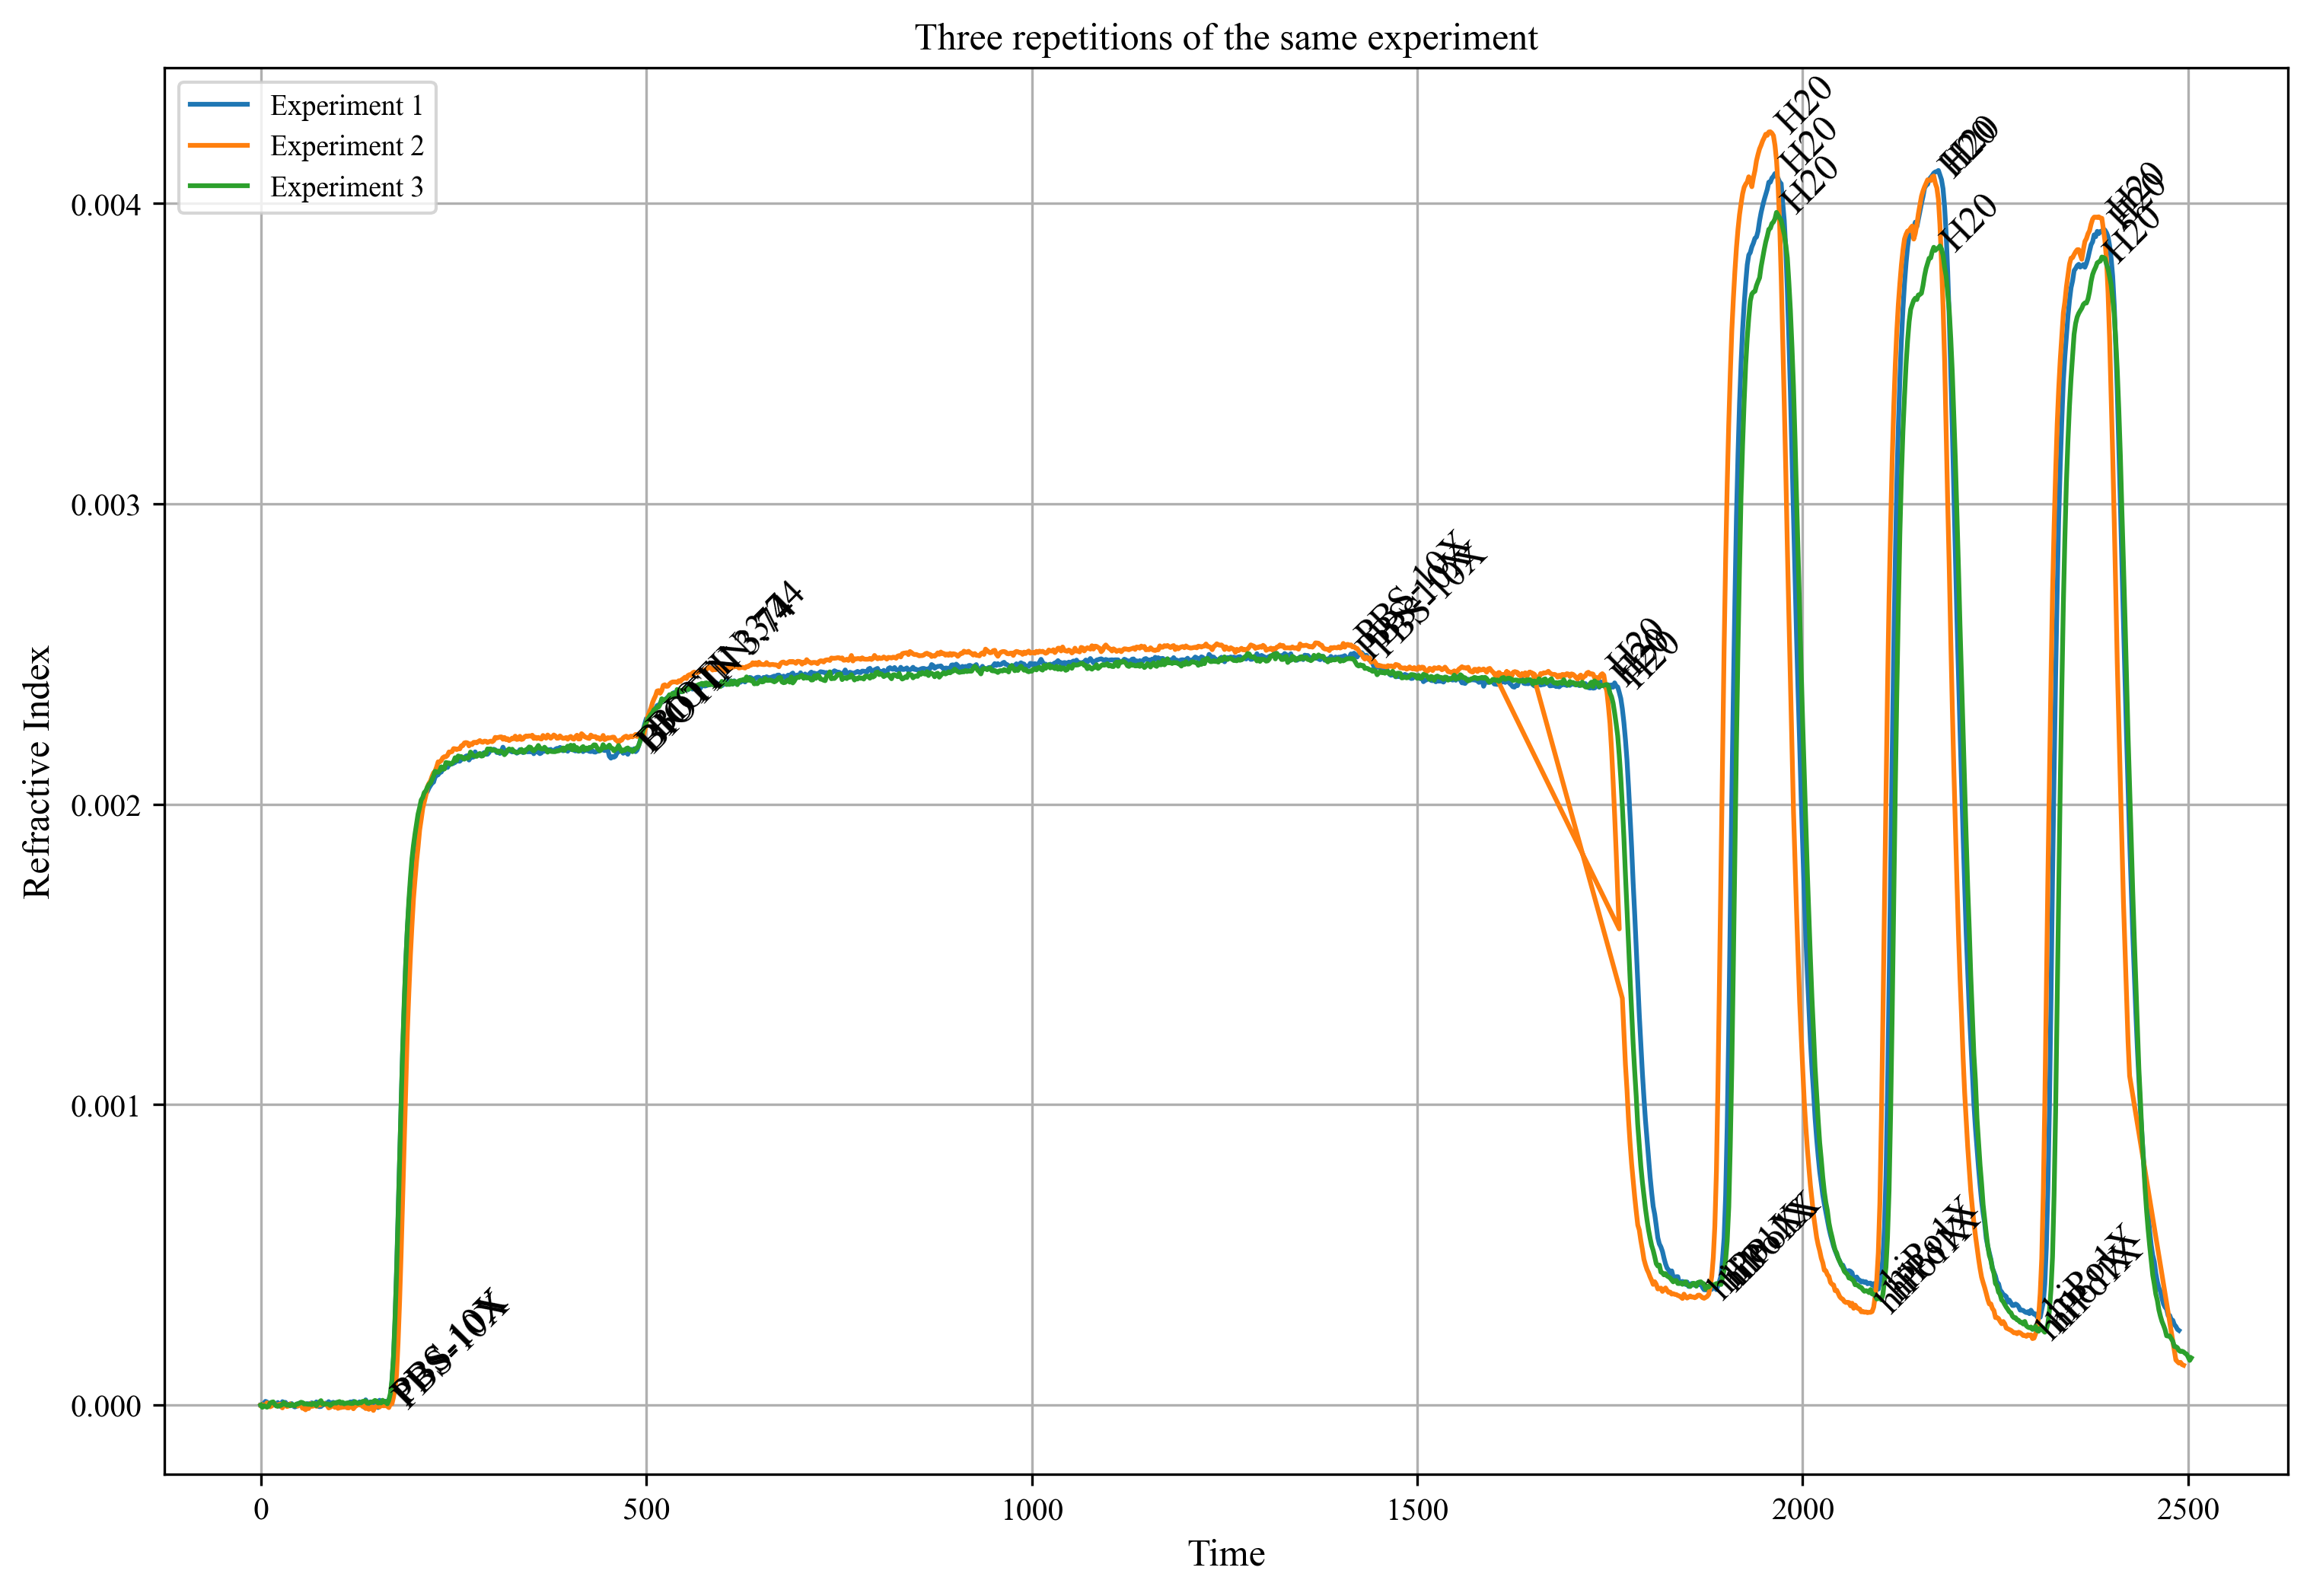

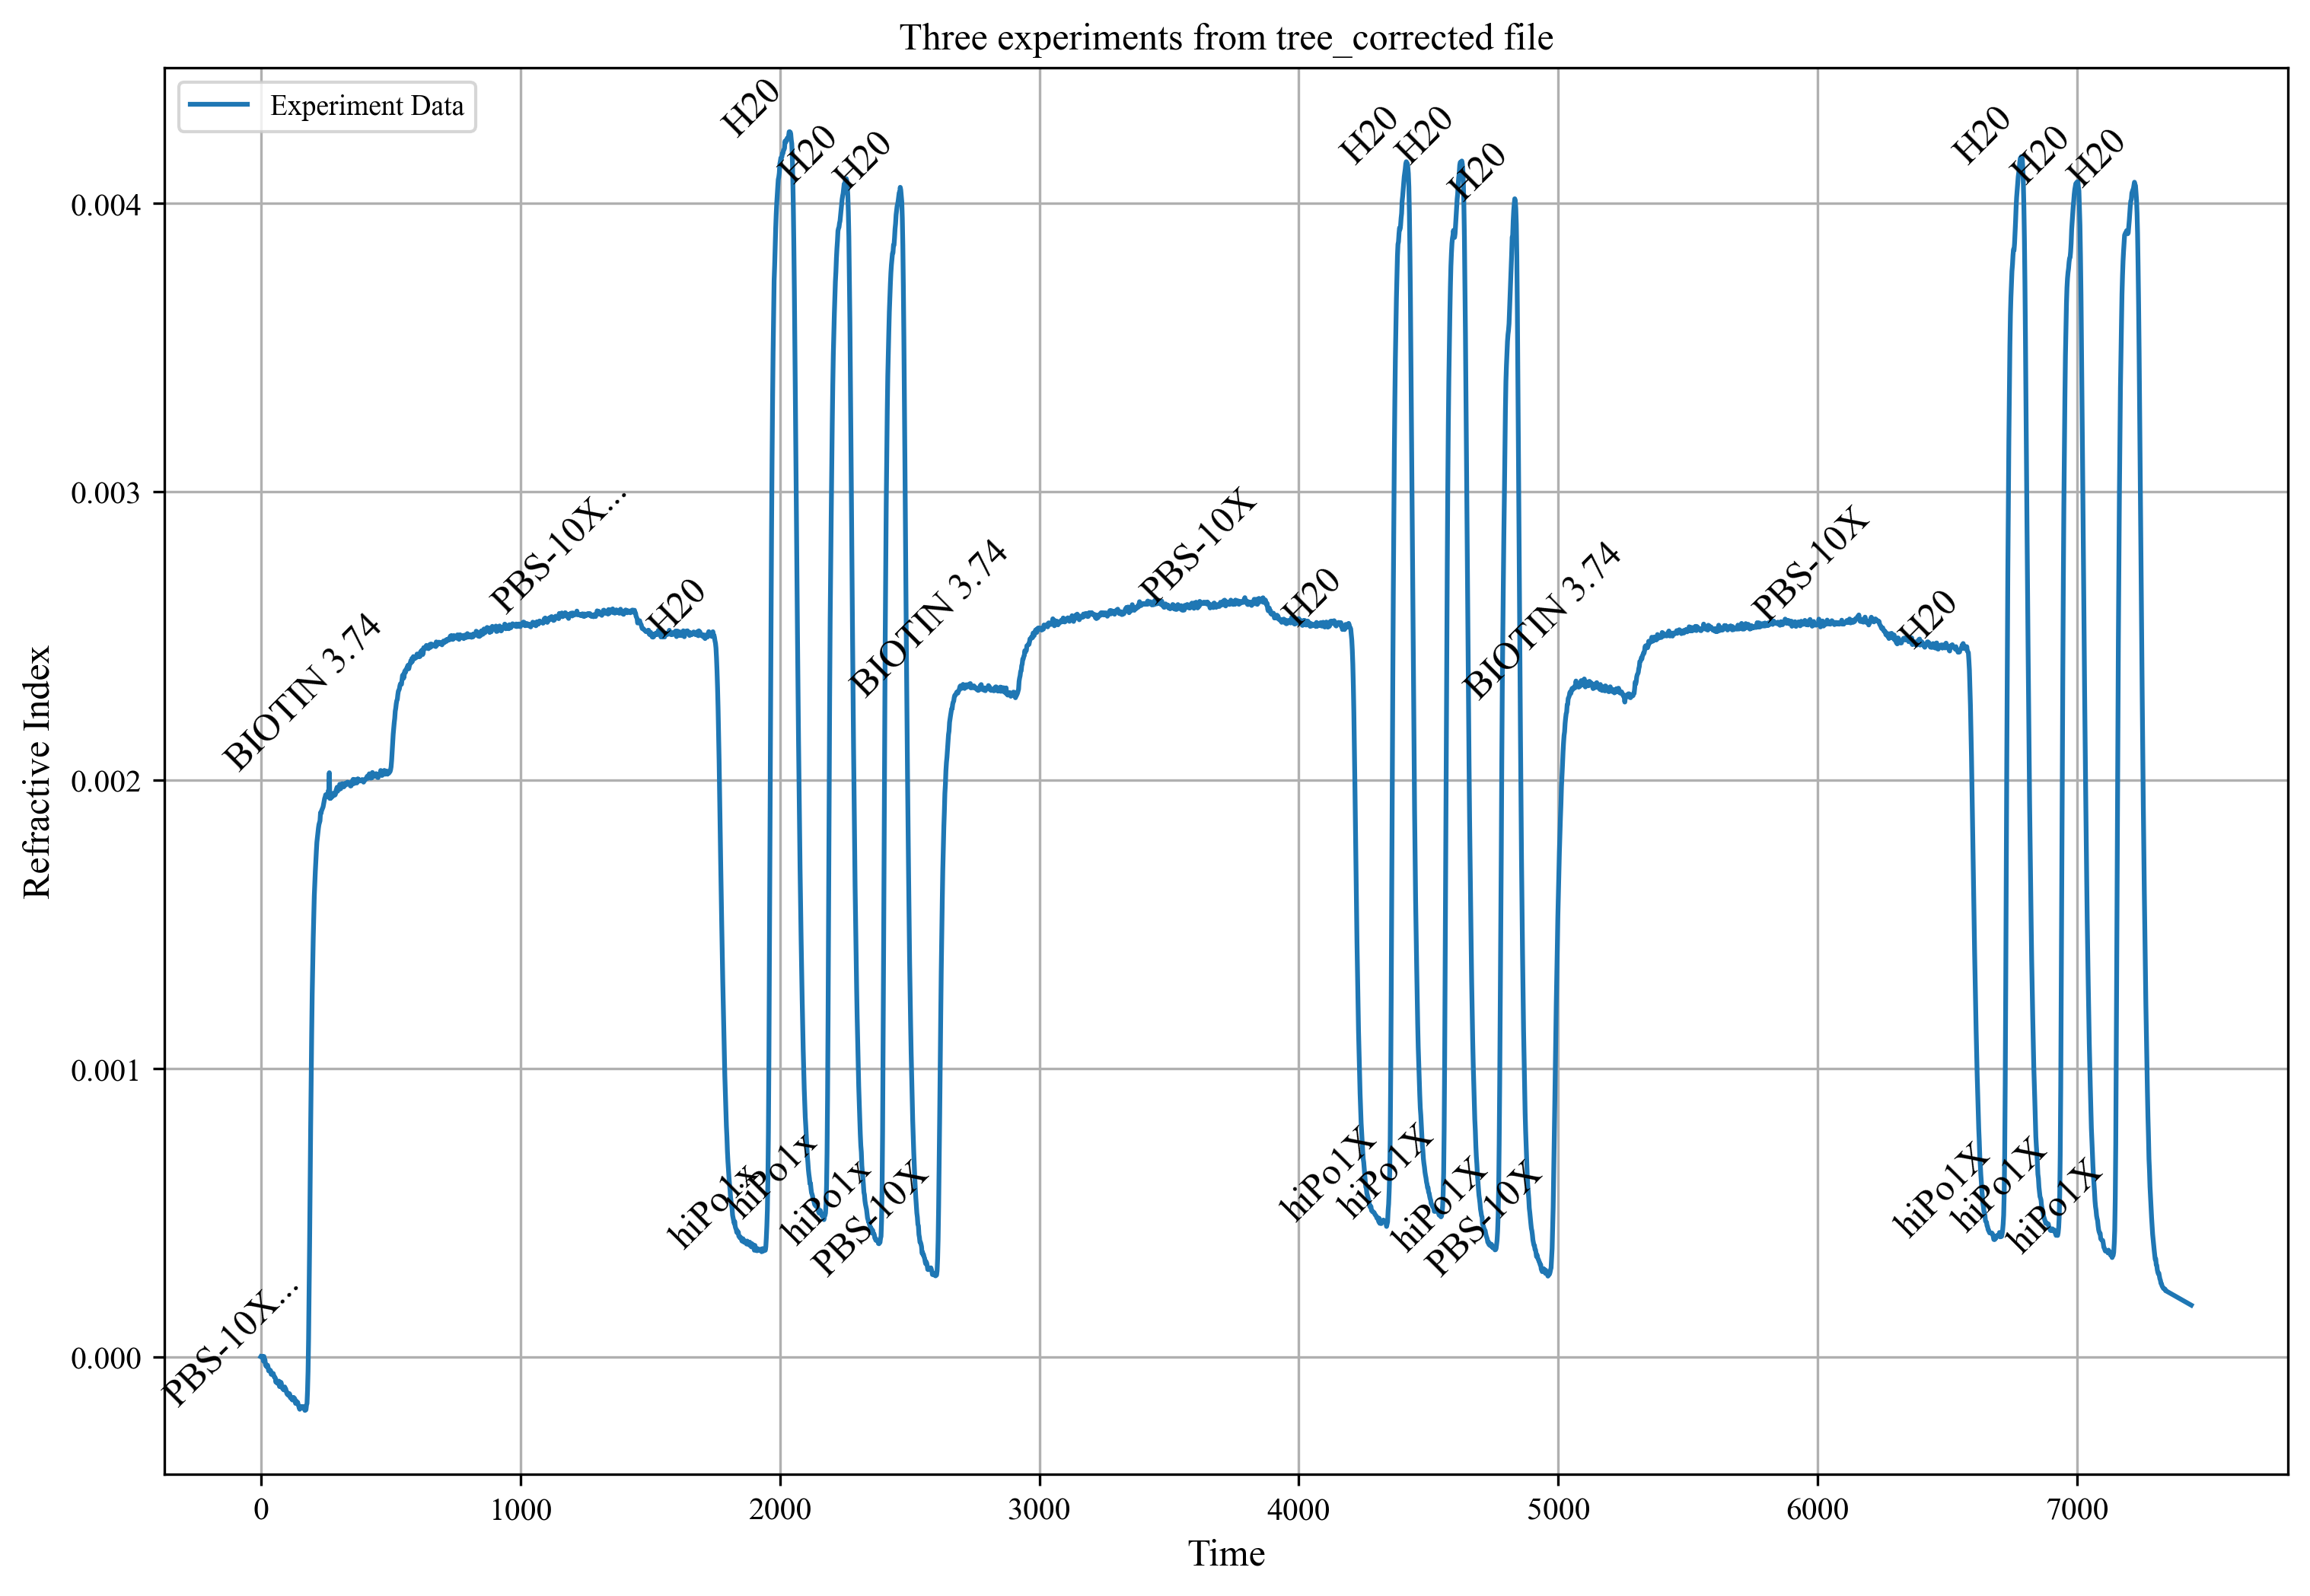

In [18]:
# File paths
file_first = 'Data/Data_biotin/RODRIGO 06-08 ONLY ONE_biotin (FIRST).csv'
file_second = 'Data/Data_biotin/RODRIGO 06-08 ONLY ONE_biotin (SECOND).csv'
file_third = 'Data/Data_biotin/RODRIGO 06-08 ONLY ONE_BIOTIN (THIRD).csv'
file_tree_corrected = 'Data/Data_biotin/RODRIGO 06-08_BIOTIN_tree_corrected.csv'
plt.rc("axes", titlesize=14)  # Title font size
plt.rc("axes", labelsize=14)  # Label font size
plt.rc("xtick", labelsize=12)  # X-tick font size
plt.rc("ytick", labelsize=12)  # Y-tick font size
plt.rc("legend", fontsize=12)  # Legend font size

# Define a list of colors for each experiment
colors = [
    "blue",
    "green",
    "red",
    "orange",
    "purple",
    "brown",
    "pink",
    "cyan",
]  # Extend if needed

plt.rc("axes", titlesize=12, labelsize=12)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)
plt.rc("legend", fontsize=9) # Slightly larger for readability in individual plots

# Create the figure with the correct aspect ratio
# Each plot is 6cm wide (18cm / 3) and we'll choose 8cm for the height.
# 1 inch = 2.54 cm
width_cm = 6
height_cm = 8
plt.figure(figsize=(width_cm / 2.54, height_cm / 2.54))
# Let's try to read the files with error handling
try:
    df1 = pd.read_csv(file_first, sep=';', on_bad_lines='skip')
    df2 = pd.read_csv(file_second, sep=';', on_bad_lines='skip')
    # The error was in the third file, so let's pay special attention to it.
    df3 = pd.read_csv(file_third, sep=';', on_bad_lines='skip')
    df_tree = pd.read_csv(file_tree_corrected, sep=';', on_bad_lines='skip')

    # Clean up column names by stripping whitespace
    df1.columns = [col.strip() for col in df1.columns]
    df2.columns = [col.strip() for col in df2.columns]
    df3.columns = [col.strip() for col in df3.columns]
    df_tree.columns = [col.strip() for col in df_tree.columns]

    # Convert columns to numeric, coercing errors
    for df in [df1, df2, df3, df_tree]:
        for col in ['Time', 'Refractive Index', 'Temperature']:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Drop rows with NaN values in crucial columns
    df1.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    df2.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    df3.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    df_tree.dropna(subset=['Time', 'Refractive Index'], inplace=True)


    # --- Plotting the three "ONLY ONE" experiments ---
    plt.figure(figsize=(12, 8), dpi = 300)
    plt.title('Three repetitions of the same experiment')
    plt.xlabel('Time')
    plt.ylabel('Refractive Index')

    plt.plot(df1['Time'], df1['Refractive Index'], label='Experiment 1')
    for _, row in df1[df1['Comment'].notna()].iterrows():
        plt.text(row['Time'], row['Refractive Index'], row['Comment'], rotation=45)

    plt.plot(df2['Time'], df2['Refractive Index'], label='Experiment 2')
    for _, row in df2[df2['Comment'].notna()].iterrows():
        plt.text(row['Time'], row['Refractive Index'], row['Comment'], rotation=45)

    plt.plot(df3['Time'], df3['Refractive Index'], label='Experiment 3')
    for _, row in df3[df3['Comment'].notna()].iterrows():
        plt.text(row['Time'], row['Refractive Index'], row['Comment'], rotation=45)

    plt.legend()
    plt.grid(True)
    plt.savefig('BiotinPlots/only_one_experiments.pdf', bbox_inches='tight')
    plt.rc("font", family="times new roman", size=12)  # Use the default serif font


    # --- Plotting the "tree_corrected" experiments ---
    plt.figure(figsize=(12, 8), dpi = 300)
    plt.title('Three experiments from tree_corrected file')
    plt.xlabel('Time')
    plt.ylabel('Refractive Index')

    comment_indices = df_tree[df_tree['Comment'].notna()].index.tolist()
    start_index = 0
    # The comments in this file seem to be marking the *end* of one phase and the beginning of another
    # So we can't cleanly split into 3 experiments in a simple way just by the comment.
    # A better approach for this file might be to just plot the whole thing, and annotate
    plt.plot(df_tree['Time'], df_tree['Refractive Index'], label='Experiment Data')
    for _, row in df_tree[df_tree['Comment'].notna()].iterrows():
        plt.text(row['Time'], row['Refractive Index'], row['Comment'], rotation=45, ha='right')

    plt.legend()
    plt.grid(True)
    plt.savefig('BiotinPlots/tree_corrected_experiments.pdf', bbox_inches='tight')
    plt.rc("font", family="times new roman", size=12)  # Use the default serif font

    print("Successfully generated plots.")

except Exception as e:
    print(f"An error occurred: {e}")

Processing segment: Experiment 1
  'H2O' comment not found, looking for 'PBS'...
  Found segment from t=486.07 to t=1434.059
Processing segment: Experiment 2
  'H2O' comment not found, looking for 'PBS'...
  Found segment from t=496.083 to t=1414.033
Processing segment: Experiment 3
  'H2O' comment not found, looking for 'PBS'...
  Found segment from t=482.065 to t=1416.096
Processing segment: Three Corrected Exp 1
  'H2O' comment not found, looking for 'PBS'...
  Found segment from t=500.088 to t=1442.069
Processing segment: Three Corrected Exp 2
  'H2O' comment not found, looking for 'PBS'...
  Found segment from t=2912.052 to t=3866.048
Processing segment: Three Corrected Exp 3
  'H2O' comment not found, looking for 'PBS'...
  Found segment from t=5278.018 to t=6226.007

Successfully generated the plot of all specified segments.


c:\Users\Rodrigo Toledo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


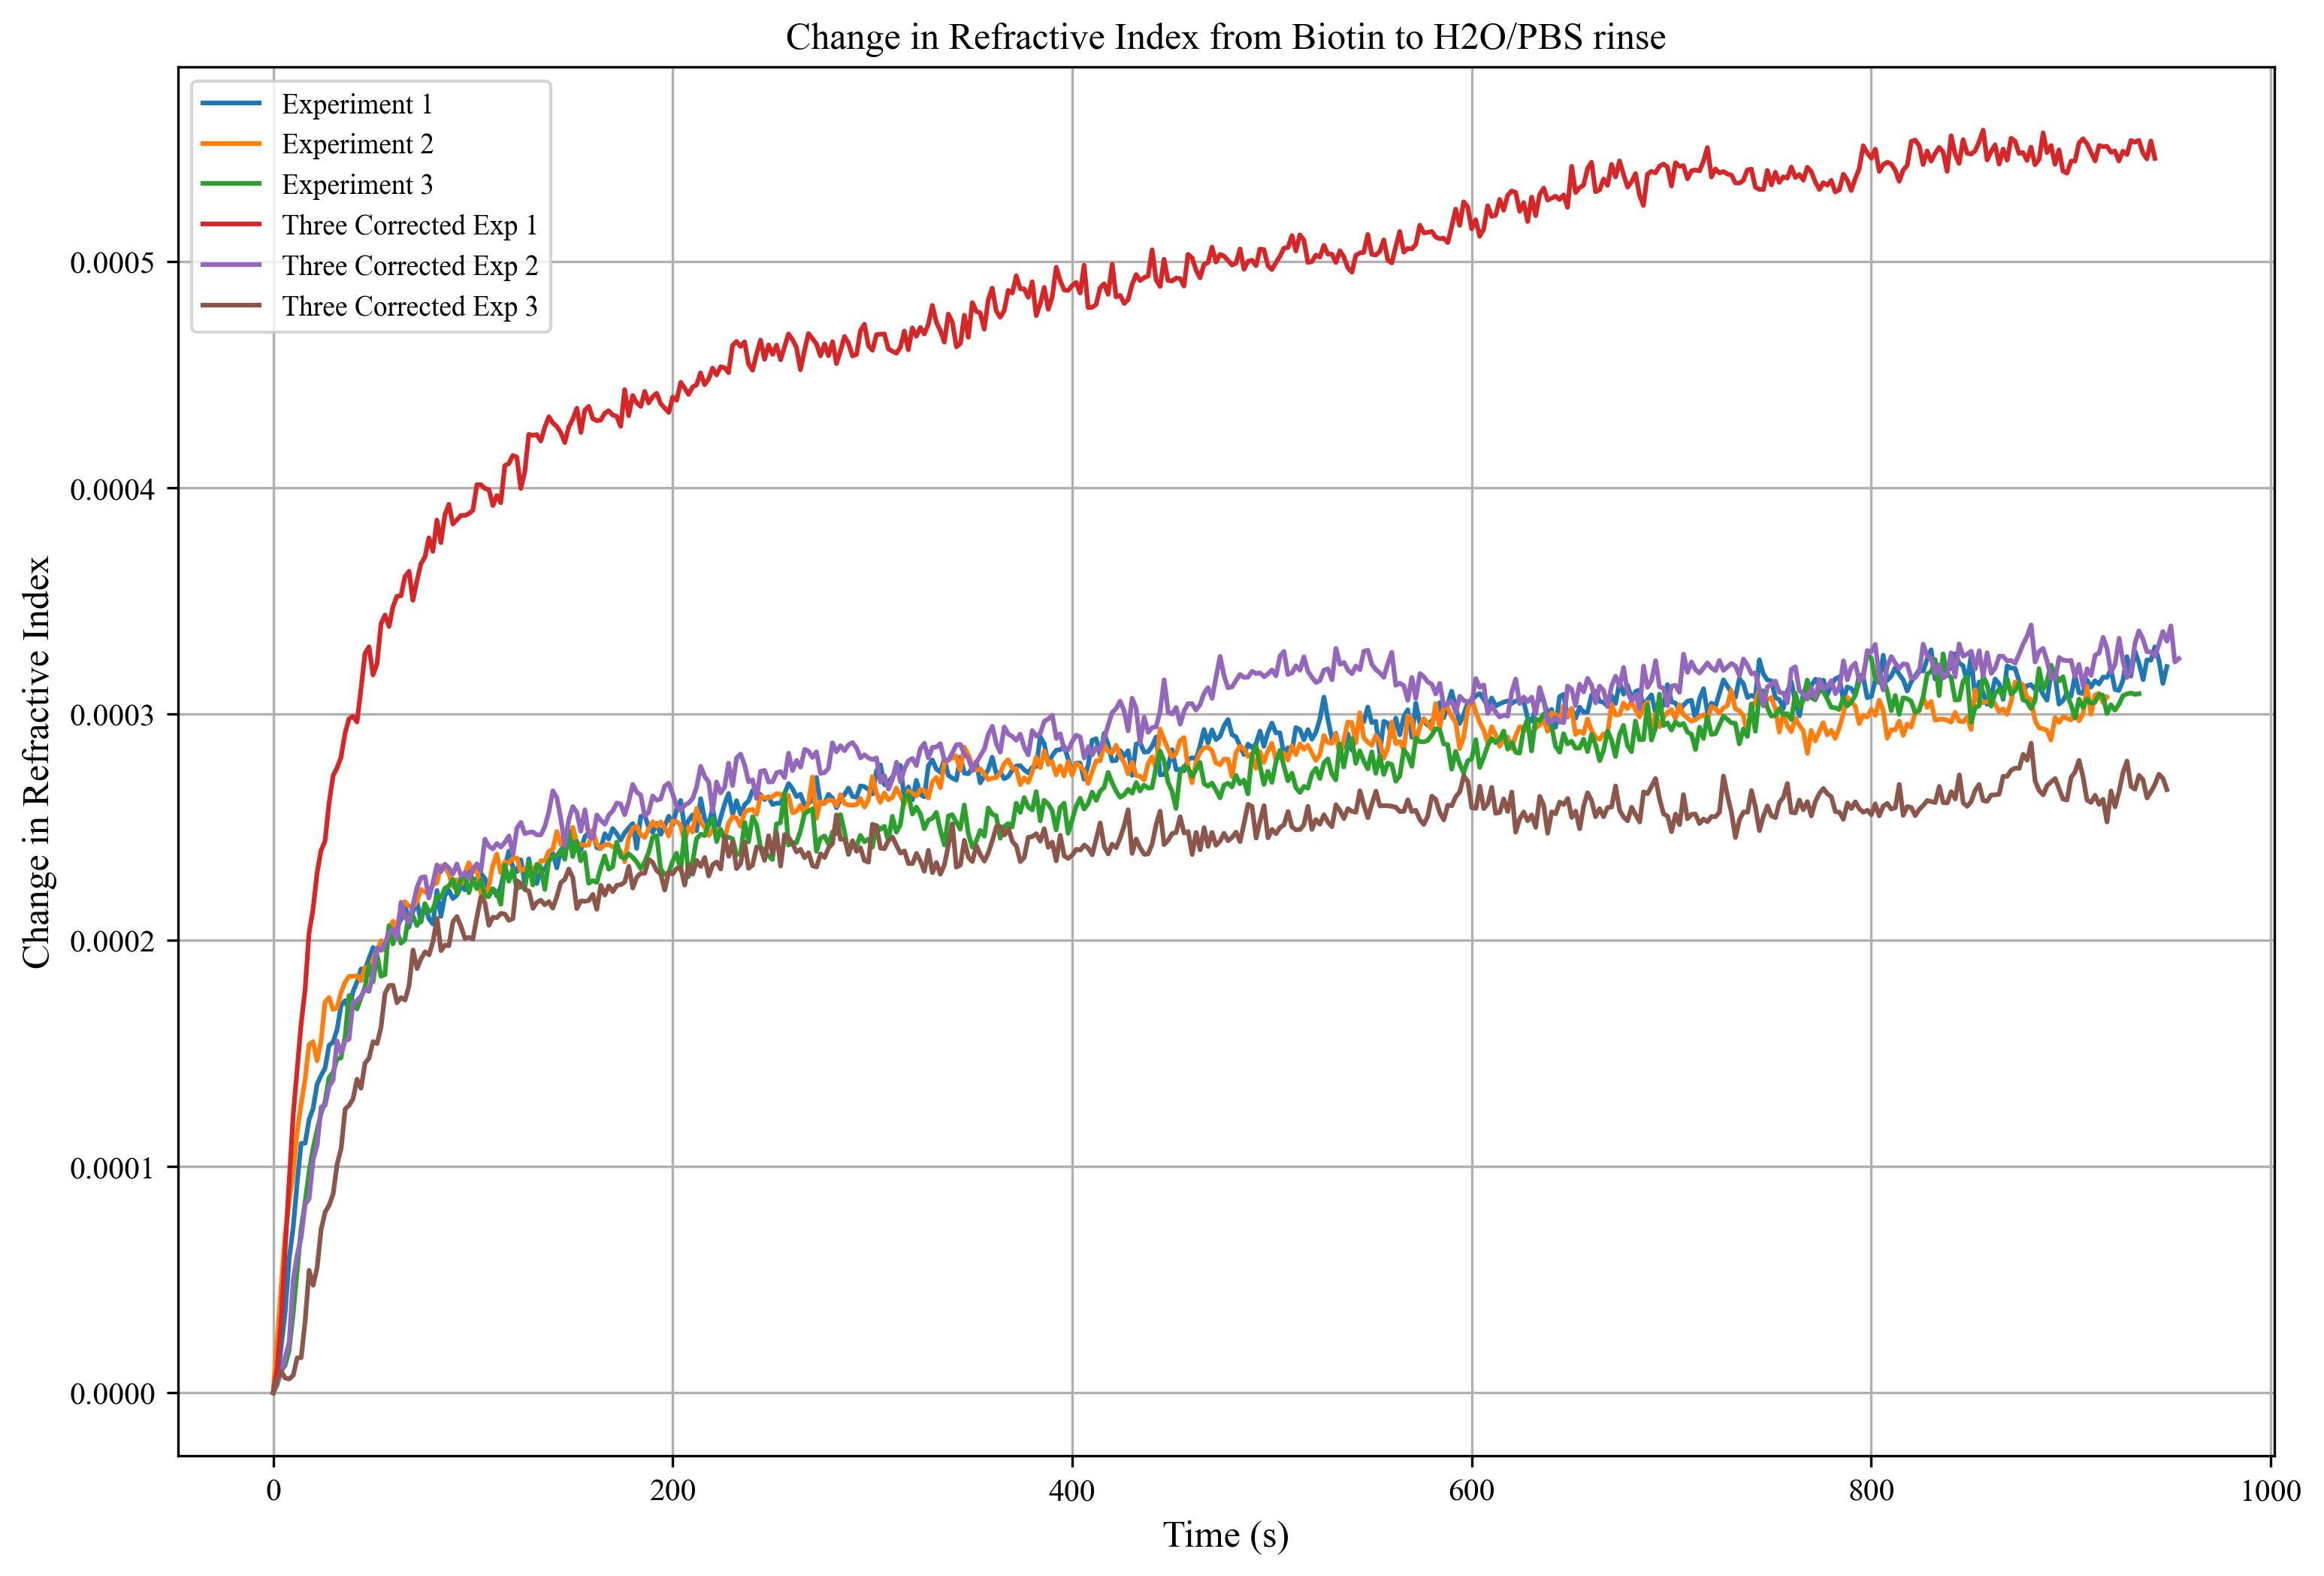

In [19]:
# --- Function to find, normalize, and plot a segment ---
def plot_segment(df, label, ax):
    """Finds the 'biotin' to 'h2o'/'pbs' segment, normalizes, and plots it."""
    print(f"Processing segment: {label}")
    # Find start and end points
    start_rows = df[df['Comment'].str.contains('biotin', na=False)]
    
    if start_rows.empty:
        print(f"  --> Biotin comment not found for {label}. Skipping.")
        return
        
    start_row = start_rows.iloc[0]
    
    # Define the search space for the end comment as everything after the start comment
    search_df = df[df['Time'] > start_row['Time']]
    
    # Try finding H2O first, then PBS as a fallback
    end_rows = search_df[search_df['Comment'].str.contains('h2o', na=False)]
    if end_rows.empty:
        print(f"  'H2O' comment not found, looking for 'PBS'...")
        end_rows = search_df[search_df['Comment'].str.contains('pbs', na=False)]

    if end_rows.empty:
        print(f"  --> Could not find H2O/PBS comment after biotin for {label}. Skipping.")
        return

    end_row = end_rows.iloc[0]

    start_time = start_row['Time']
    end_time = end_row['Time']

    print(f"  Found segment from t={start_time} to t={end_time}")

    # Slice the dataframe
    segment = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)].copy()

    # Normalize time and refractive index
    segment['Normalized Time'] = segment['Time'] - start_time
    start_refractive_index = segment.iloc[0]['Refractive Index']
    segment['Normalized Refractive Index'] = segment['Refractive Index'] - start_refractive_index

    # Plot the segment
    ax.plot(segment['Normalized Time'], segment['Normalized Refractive Index'], label=label)

# --- Main script ---

# Create Figure
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)
ax.set_title('Change in Refractive Index from Biotin to H2O/PBS rinse')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Change in Refractive Index')

# Process the three "ONLY ONE" files
files_only_one = {
    "Experiment 1": file_first,
    "Experiment 2": file_second,
    "Experiment 3": file_third,
}

for label, path in files_only_one.items():
    try:
        df = pd.read_csv(path, sep=';', on_bad_lines='skip')
        df.columns = [col.strip() for col in df.columns]
        for col in ['Time', 'Refractive Index']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df.dropna(subset=['Time', 'Refractive Index'], inplace=True)
        df['Comment'] = df['Comment'].astype(str).str.lower()
        plot_segment(df, label, ax)
    except Exception as e:
        print(f"Could not process file {path}. Error: {e}")

# Process the "tree_corrected" file by splitting it
try:
    df_tree = pd.read_csv(file_tree_corrected, sep=';', on_bad_lines='skip')
    df_tree.columns = [col.strip() for col in df_tree.columns]
    for col in ['Time', 'Refractive Index']:
        df_tree[col] = pd.to_numeric(df_tree[col], errors='coerce')
    df_tree.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    df_tree['Comment'] = df_tree['Comment'].astype(str).str.lower()
    
    # Split the dataframe by 'biotin' comments
    split_indices = df_tree[df_tree['Comment'].str.contains('biotin', na=False)].index.tolist()
    
    # Create a list of the split dataframes
    # Each dataframe starts at a 'biotin' comment and goes to the start of the next one (or the end of the file)
    experiment_dfs = np.split(df_tree, split_indices[1:])
    
    for i, exp_df in enumerate(experiment_dfs, 1):
        plot_segment(exp_df, f"Three Corrected Exp {i}", ax)
        
except Exception as e:
    print(f"Could not process file {file_tree_corrected}. Error: {e}")

# Finalize plot
ax.legend()
plt.rc("font", family="times new roman", size=12)
ax.grid(True)
plt.savefig('BiotinPlots/biotin_to_h2o_pbs_segments.pdf', bbox_inches='tight')

print("\nSuccessfully generated the plot of all specified segments.")

Processing segment: Exp_recalib 1
  'H2O' comment not found, looking for 'PBS'...
  Found segment from t=486.07 to t=1434.059
Processing segment: Exp_recalib 2
  'H2O' comment not found, looking for 'PBS'...
  Found segment from t=496.083 to t=1414.033
Processing segment: Exp_recalib 3
  'H2O' comment not found, looking for 'PBS'...
  Found segment from t=482.065 to t=1416.096

Successfully generated the plot for separated experiments.


c:\Users\Rodrigo Toledo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Processing segment: FULL Exp_part 1
  'H2O' comment not found, looking for 'PBS'...
  Found segment from t=500.088 to t=1442.069
Processing segment: FULL Exp_part 2
  'H2O' comment not found, looking for 'PBS'...
  Found segment from t=2912.052 to t=3866.048
Processing segment: FULL Exp_part 3
  'H2O' comment not found, looking for 'PBS'...
  Found segment from t=5278.018 to t=6226.007

Successfully generated the plot for corrected experiments.


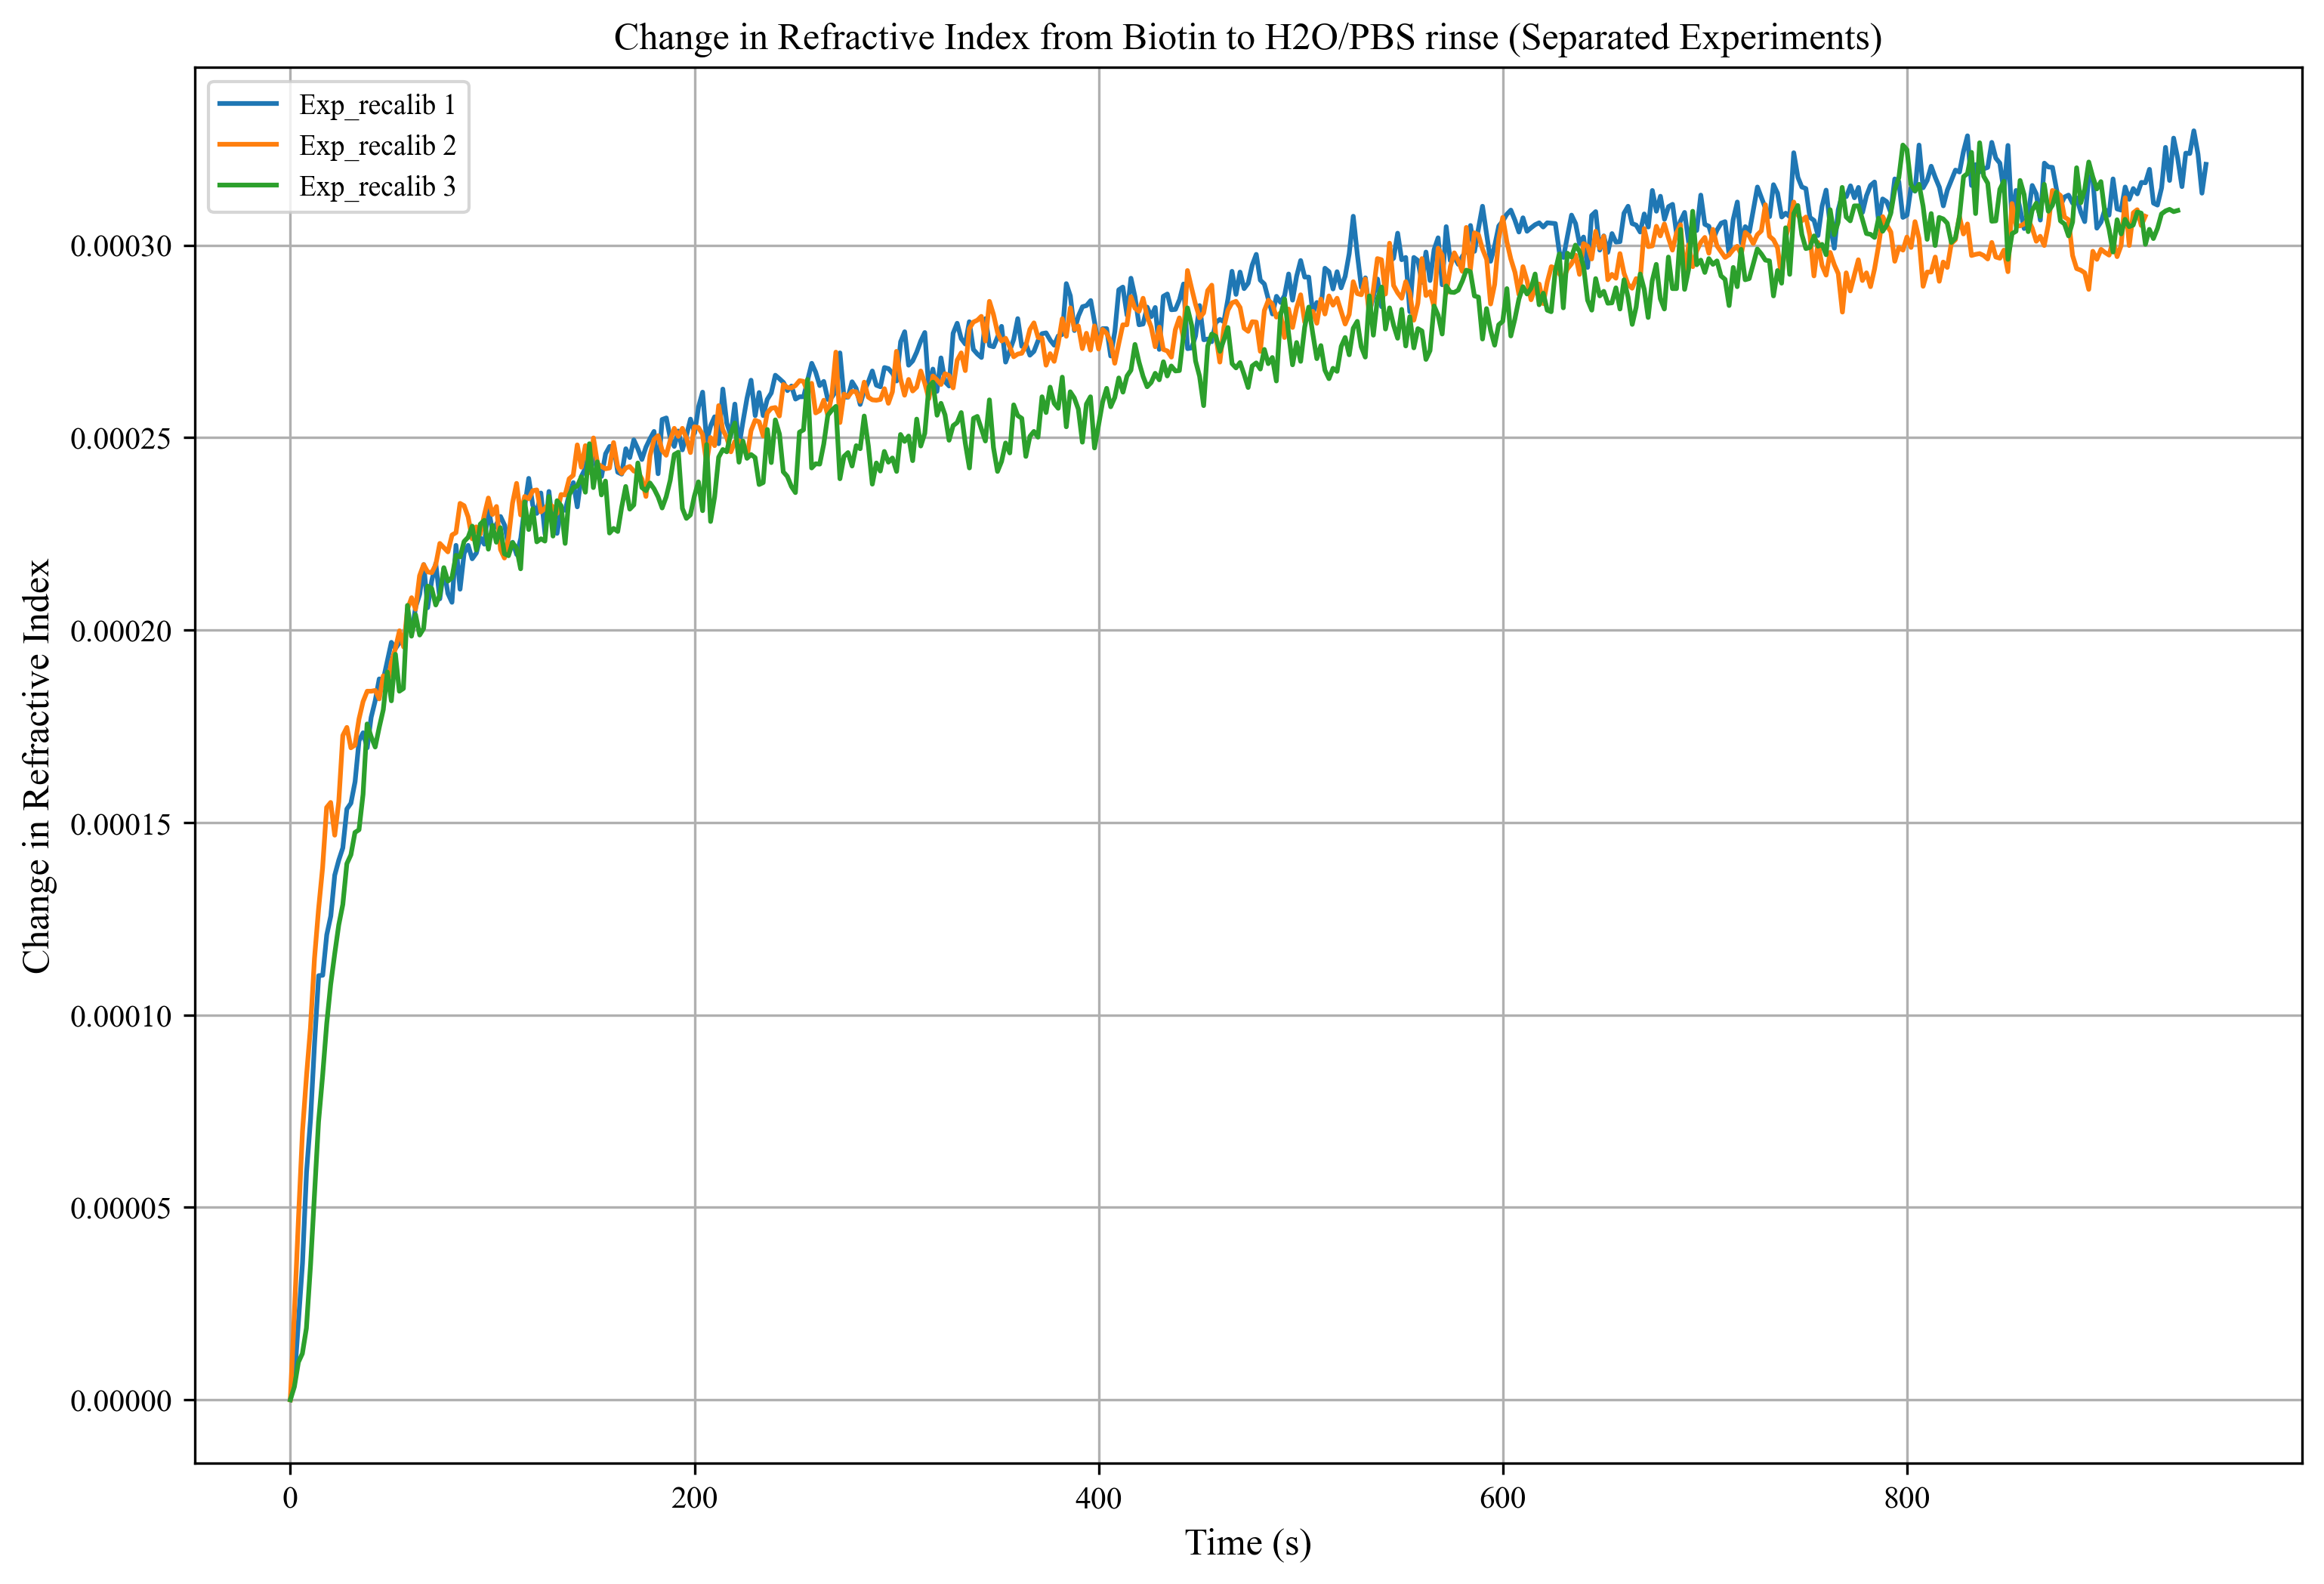

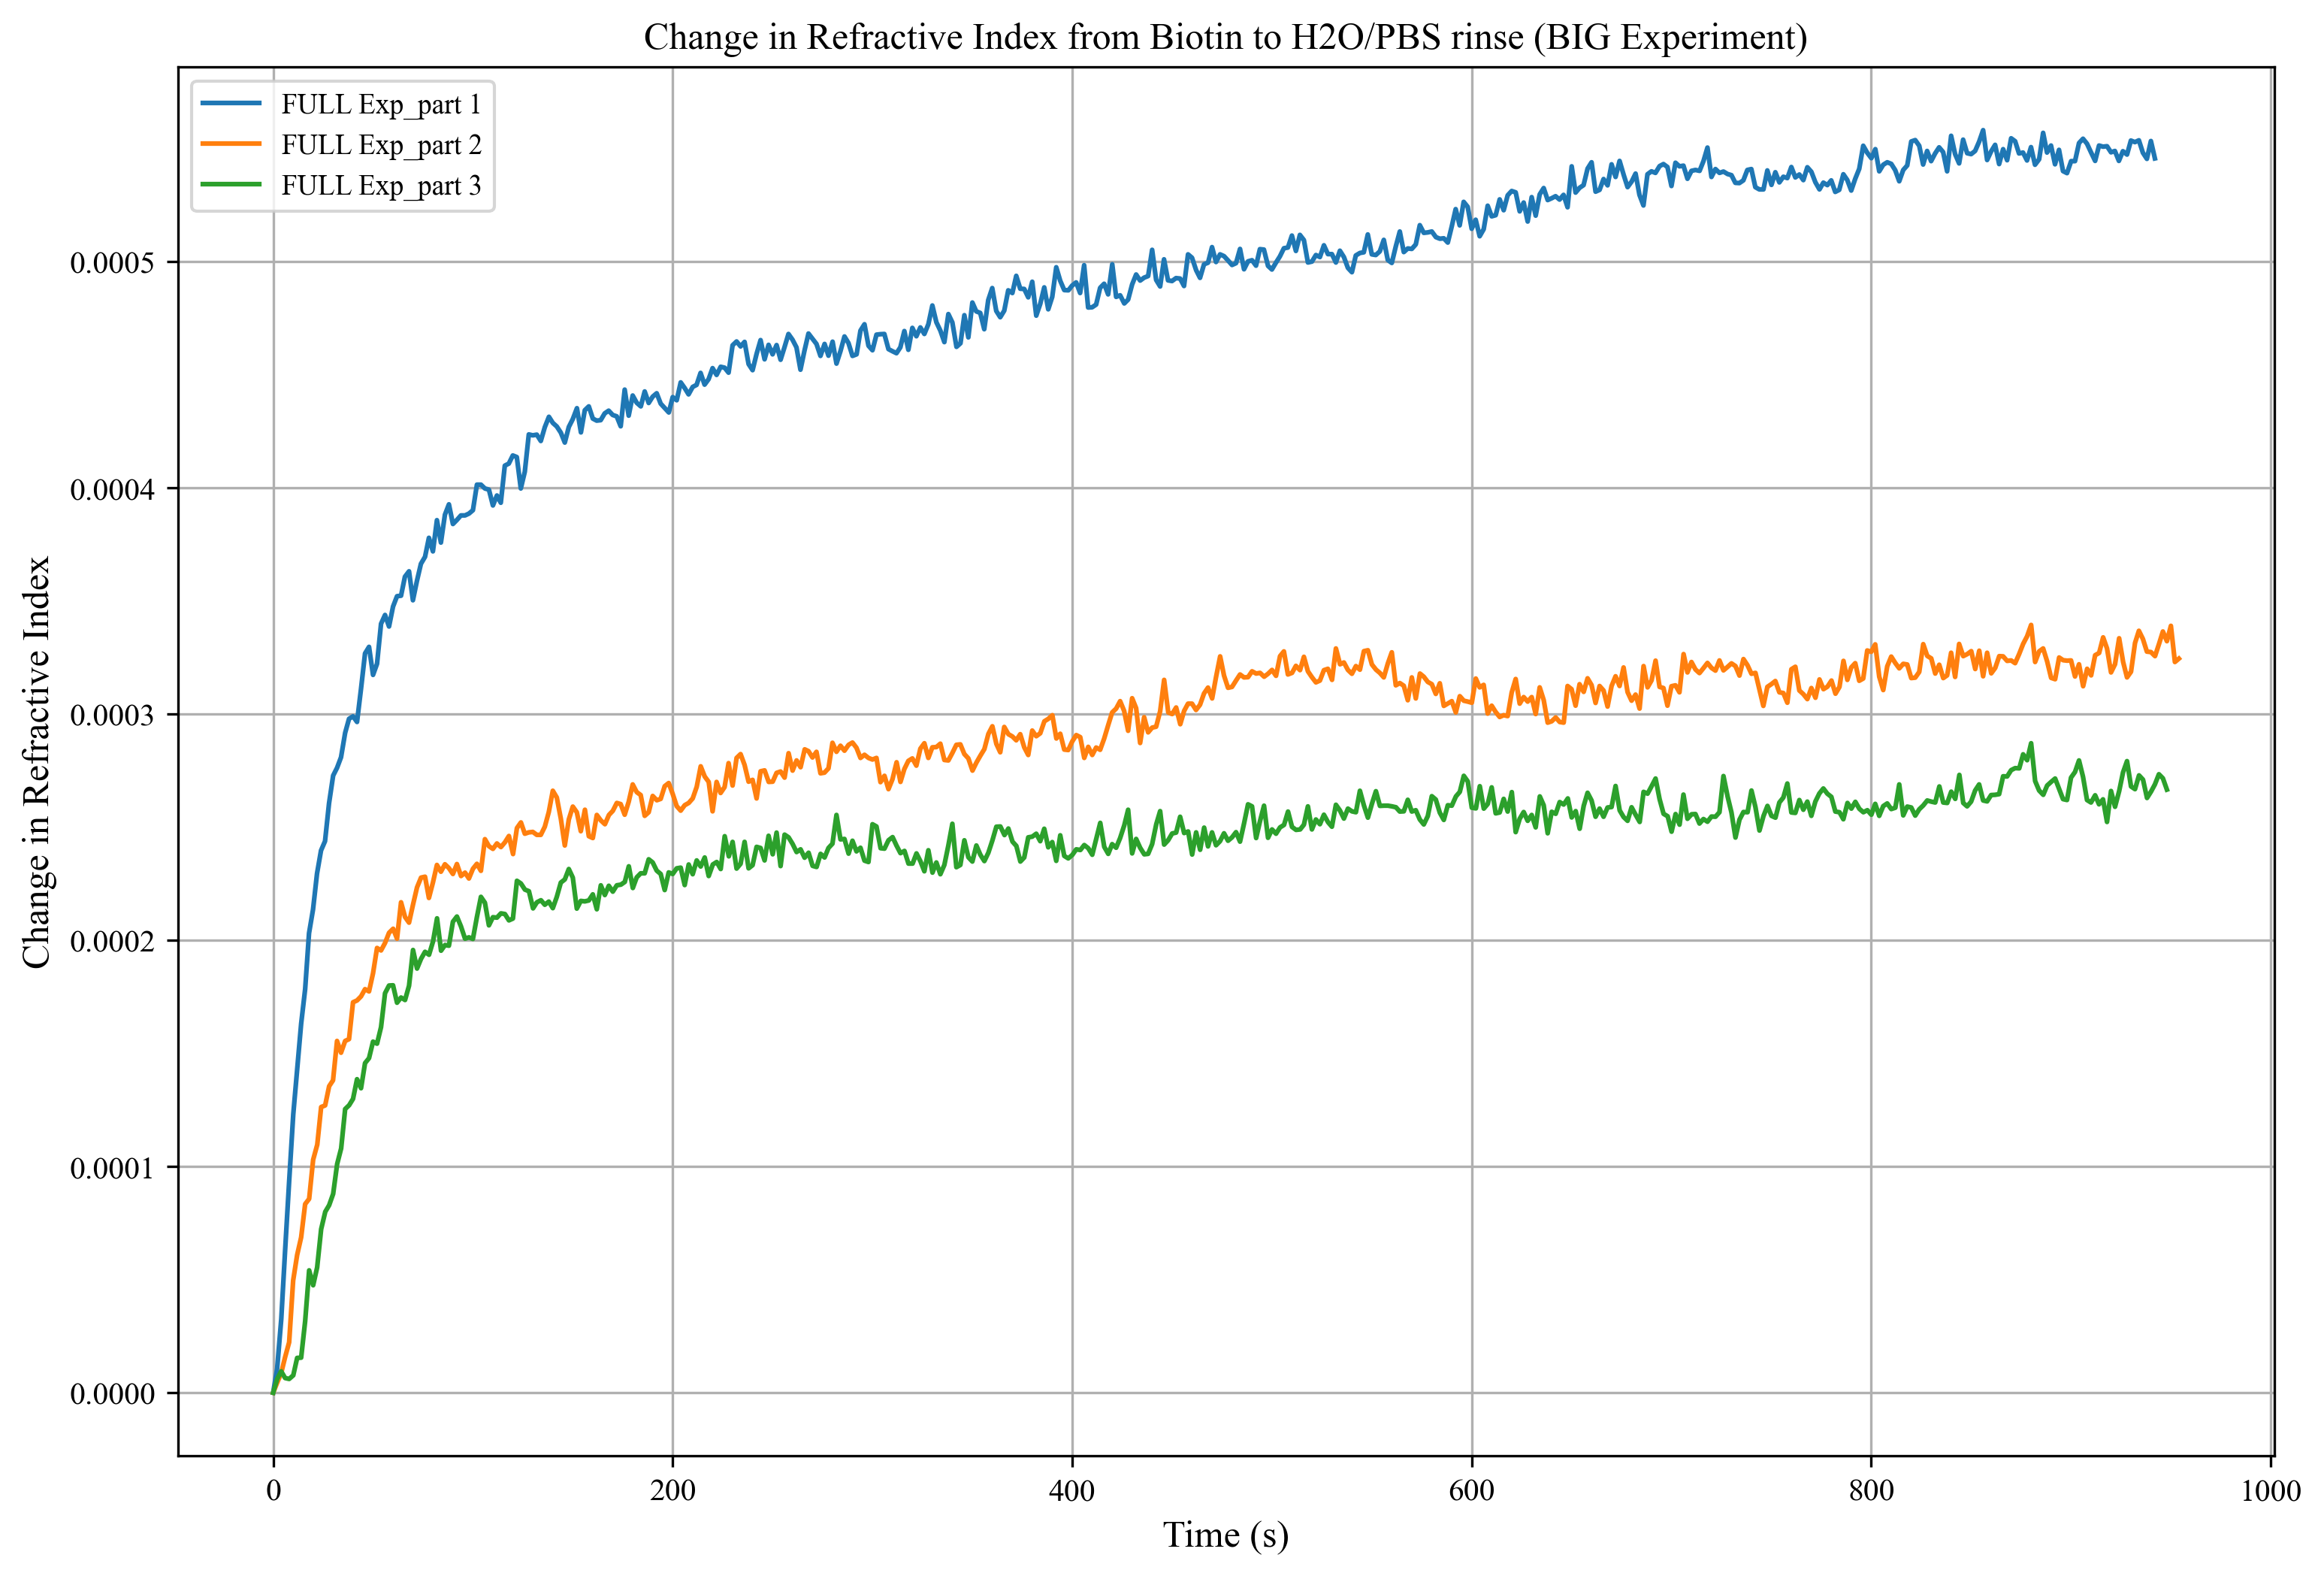

In [23]:
# --- Function to extract a data segment ---
def get_segment(df):
    """Finds and returns the 'biotin' to 'h2o'/'pbs' segment."""
    df['Comment'] = df['Comment'].astype(str).str.lower()
    start_rows = df[df['Comment'].str.contains('biotin', na=False)]
    if start_rows.empty: return None
    start_row = start_rows.iloc[0]
    
    search_df = df[df['Time'] > start_row['Time']]
    end_rows = search_df[search_df['Comment'].str.contains('h20', na=False)] # 'h20' with a zero
    if end_rows.empty:
        end_rows = search_df[search_df['Comment'].str.contains('pbs', na=False)]
    if end_rows.empty: return None
    end_row = end_rows.iloc[0]
    
    segment = df[(df['Time'] >= start_row['Time']) & (df['Time'] <= end_row['Time'])].copy()
    segment['Normalized Time'] = segment['Time'] - start_row['Time']
    start_refractive_index = segment.iloc[0]['Refractive Index']
    segment['Normalized Refractive Index'] = segment['Refractive Index'] - start_refractive_index
    return segment

# --- Plot 1: Separated Experiments ---
fig1, ax1 = plt.subplots(figsize=(12, 8), dpi=300)
ax1.set_title('Change in Refractive Index from Biotin to H2O/PBS rinse (Separated Experiments)')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Change in Refractive Index')

files_only_one = {
    "Exp_recalib 1": file_first,
    "Exp_recalib 2": file_second,
    "Exp_recalib 3": file_third,
}

for label, path in files_only_one.items():
    try:
        df = pd.read_csv(path, sep=';', on_bad_lines='skip')
        df.columns = [col.strip() for col in df.columns]
        for col in ['Time', 'Refractive Index']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df.dropna(subset=['Time', 'Refractive Index'], inplace=True)
        df['Comment'] = df['Comment'].astype(str).str.lower()
        plot_segment(df, label, ax1)
    except Exception as e:
        print(f"Could not process file {path}. Error: {e}")
        
# Finalize Plot 1
ax1.legend()
plt.rc("font", family="times new roman", size=12)
ax1.grid(True)
plt.savefig('BiotinPlots/separated_segments.pdf', bbox_inches='tight')

print("\nSuccessfully generated the plot for separated experiments.")

# --- Plot 2: Corrected Experiments ---
fig2, ax2 = plt.subplots(figsize=(12, 8), dpi=300)
ax2.set_title('Change in Refractive Index from Biotin to H2O/PBS rinse (BIG Experiment)')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Change in Refractive Index')

try:
    df_tree = pd.read_csv(file_tree_corrected, sep=';', on_bad_lines='skip')
    df_tree.columns = [col.strip() for col in df_tree.columns]
    for col in ['Time', 'Refractive Index']:
        df_tree[col] = pd.to_numeric(df_tree[col], errors='coerce')
    df_tree.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    df_tree['Comment'] = df_tree['Comment'].astype(str).str.lower()
    
    # Split the dataframe by 'biotin' comments
    split_indices = df_tree[df_tree['Comment'].str.contains('biotin', na=False)].index.tolist()
    
    # Create a list of the split dataframes
    experiment_dfs = np.split(df_tree, split_indices[1:])
    
    for i, exp_df in enumerate(experiment_dfs, 1):
        plot_segment(exp_df, f"FULL Exp_part {i}", ax2)
        
except Exception as e:
    print(f"Could not process file {file_tree_corrected}. Error: {e}")

# Finalize Plot 2
ax2.legend()
plt.rc("font", family="times new roman", size=12)
ax2.grid(True)
plt.savefig('BiotinPlots/FULLExp_segments.pdf', bbox_inches='tight')

print("\nSuccessfully generated the plot for corrected experiments.")


--- Correlation Matrix for: Separated Experiments ---
              Experiment 1  Experiment 2  Experiment 3
Experiment 1      1.000000      0.958011      0.962895
Experiment 2      0.958011      1.000000      0.912860
Experiment 3      0.962895      0.912860      1.000000
Heatmap saved to BiotinPlots/correlation_separated.pdf

--- Correlation Matrix for: FULL Experiment ---
           Exp_part1  Exp_part2  Exp_part3
Exp_part1   1.000000   0.953382   0.881340
Exp_part2   0.953382   1.000000   0.957076
Exp_part3   0.881340   0.957076   1.000000
Heatmap saved to BiotinPlots/correlation_FULL.pdf


c:\Users\Rodrigo Toledo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


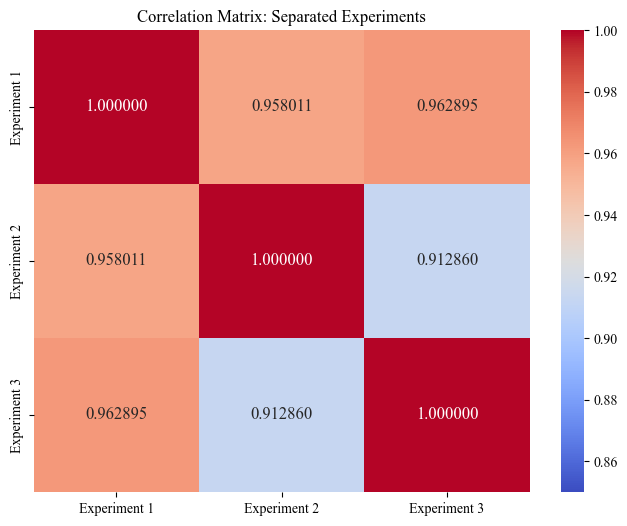

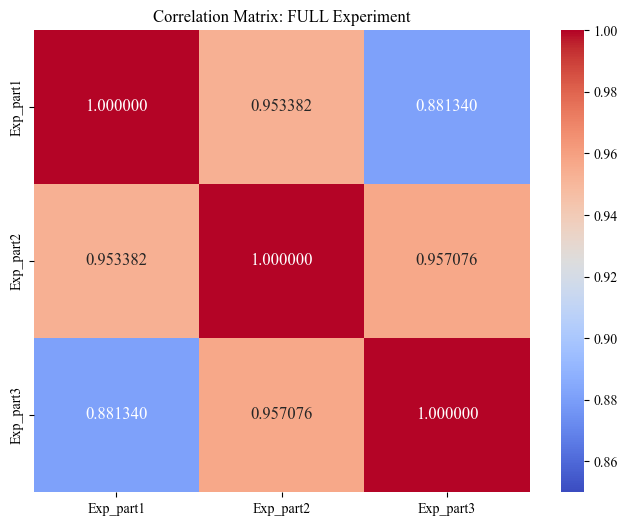

In [30]:
# --- Function to extract a data segment ---
def get_segment(df):
    """Finds and returns the 'biotin' to 'h2o'/'pbs' segment."""
    df['Comment'] = df['Comment'].astype(str).str.lower()
    start_rows = df[df['Comment'].str.contains('biotin', na=False)]
    if start_rows.empty: return None
    start_row = start_rows.iloc[0]
    
    search_df = df[df['Time'] > start_row['Time']]
    end_rows = search_df[search_df['Comment'].str.contains('h20', na=False)] # 'h20' with a zero
    if end_rows.empty:
        end_rows = search_df[search_df['Comment'].str.contains('pbs', na=False)]
    if end_rows.empty: return None
    end_row = end_rows.iloc[0]
    
    segment = df[(df['Time'] >= start_row['Time']) & (df['Time'] <= end_row['Time'])].copy()
    segment['Normalized Time'] = segment['Time'] - start_row['Time']
    start_refractive_index = segment.iloc[0]['Refractive Index']
    segment['Normalized Refractive Index'] = segment['Refractive Index'] - start_refractive_index
    return segment

# --- Function to perform correlation analysis on a set of segments ---
def analyze_correlation(segments_dict, title, output_filename):
    """Interpolates segments, calculates correlation, and plots a heatmap."""
    # Find the minimum duration to create a common time axis
    min_duration = min(seg['Normalized Time'].max() for seg in segments_dict.values())
    common_time = np.linspace(0, min_duration, num=500)
    
    interpolated_data = {}
    for label, segment in segments_dict.items():
        # Interpolate each segment onto the common time axis
        interpolated_values = np.interp(common_time, segment['Normalized Time'], segment['Normalized Refractive Index'])
        interpolated_data[label] = interpolated_values
        
    # Create a DataFrame and calculate correlation
    df_interp = pd.DataFrame(interpolated_data)
    correlation_matrix = df_interp.corr()
    
    print(f"\n--- Correlation Matrix for: {title} ---")
    print(correlation_matrix)
    
    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, fmt=".6f", cmap='coolwarm', vmin=0.85, vmax=1.0)
    plt.title(f'Correlation Matrix: {title}')
    plt.savefig(output_filename)
    print(f"Heatmap saved to {output_filename}")

# --- Main script ---

# 1. Process Separated Experiments
files_only_one = {"Experiment 1": file_first, "Experiment 2": file_second, "Experiment 3": file_third}
separated_segments = {}
for label, path in files_only_one.items():
    df = pd.read_csv(path, sep=';', on_bad_lines='skip')
    df.columns = [col.strip() for col in df.columns]
    for col in ['Time', 'Refractive Index']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    segment = get_segment(df)
    if segment is not None:
        separated_segments[label] = segment

if len(separated_segments) > 1:
    analyze_correlation(separated_segments, 'Separated Experiments', 'BiotinPlots/correlation_separated.pdf')

# 2. Process Corrected Experiments
corrected_segments = {}
try:
    df_tree = pd.read_csv(file_tree_corrected, sep=';', on_bad_lines='skip')
    df_tree.columns = [col.strip() for col in df_tree.columns]
    for col in ['Time', 'Refractive Index']:
        df_tree[col] = pd.to_numeric(df_tree[col], errors='coerce')
    df_tree.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    df_tree['Comment'] = df_tree['Comment'].astype(str).str.lower()
    
    split_indices = df_tree[df_tree['Comment'].str.contains('biotin', na=False)].index.tolist()
    experiment_dfs = np.split(df_tree, split_indices[1:])
    
    for i, exp_df in enumerate(experiment_dfs, 1):
        label = f"Exp_part{i}"
        segment = get_segment(exp_df.copy()) # Pass a copy to avoid SettingWithCopyWarning
        if segment is not None:
            corrected_segments[label] = segment
            
    if len(corrected_segments) > 1:
        analyze_correlation(corrected_segments, 'FULL Experiment', 'BiotinPlots/correlation_FULL.pdf')
except Exception as e:
    print(f"Could not process corrected experiments. Error: {e}")

c:\Users\Rodrigo Toledo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



--- Correlation Matrix for: All 6 Experiments ---
              Experiment 1  Experiment 2  Experiment 3  Exp_part1  Exp_part2  \
Experiment 1      1.000000      0.958011      0.962895   0.927062   0.967393   
Experiment 2      0.958011      1.000000      0.912860   0.855049   0.916758   
Experiment 3      0.962895      0.912860      1.000000   0.965792   0.961189   
Exp_part1         0.927062      0.855049      0.965792   1.000000   0.953769   
Exp_part2         0.967393      0.916758      0.961189   0.953769   1.000000   
Exp_part3         0.956768      0.933183      0.926716   0.882935   0.957387   

              Exp_part3  
Experiment 1   0.956768  
Experiment 2   0.933183  
Experiment 3   0.926716  
Exp_part1      0.882935  
Exp_part2      0.957387  
Exp_part3      1.000000  
Heatmap saved to BiotinPlots/correlation_all_6_experiments.png


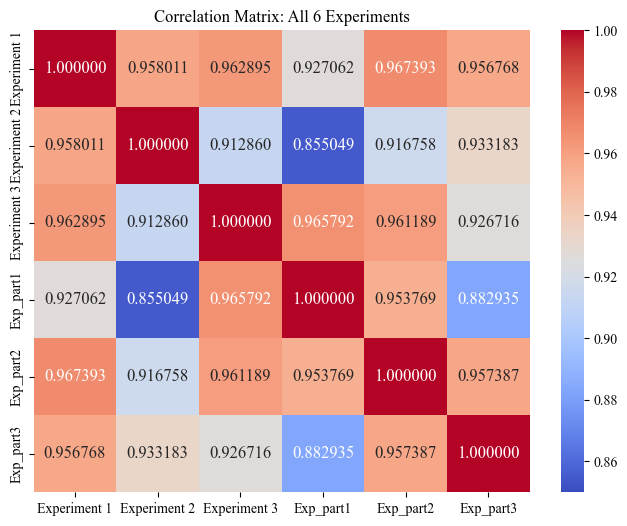

In [33]:
# Create a dictionary to hold all 6 segments
all_segments = {}

# 1. Process Separated Experiments
files_only_one = {"Experiment 1": file_first, "Experiment 2": file_second, "Experiment 3": file_third}
for label, path in files_only_one.items():
    try:
        df = pd.read_csv(path, sep=';', on_bad_lines='skip')
        df.columns = [col.strip() for col in df.columns]
        for col in ['Time', 'Refractive Index']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df.dropna(subset=['Time', 'Refractive Index'], inplace=True)
        segment = get_segment(df)
        if segment is not None:
            all_segments[label] = segment
    except Exception as e:
        print(f"Could not process file {path}. Error: {e}")

# 2. Process Corrected Experiments
try:
    df_tree = pd.read_csv(file_tree_corrected, sep=';', on_bad_lines='skip')
    df_tree.columns = [col.strip() for col in df_tree.columns]
    for col in ['Time', 'Refractive Index']:
        df_tree[col] = pd.to_numeric(df_tree[col], errors='coerce')
    df_tree.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    
    split_indices = df_tree[df_tree['Comment'].str.lower().str.contains('biotin', na=False)].index.tolist()
    experiment_dfs = np.split(df_tree, split_indices[1:])
    
    for i, exp_df in enumerate(experiment_dfs, 1):
        label = f"Exp_part{i}"
        segment = get_segment(exp_df.copy())
        if segment is not None:
            all_segments[label] = segment
except Exception as e:
    print(f"Could not process corrected experiments. Error: {e}")

# 3. Run combined analysis
analyze_correlation(all_segments, 'All 6 Experiments', 'BiotinPlots/correlation_all_6_experiments.png')


c:\Users\Rodrigo Toledo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


--- Feature Table ---
| Experiment      |   Max Signal |   Mean Signal |   Signal Std Dev |   Area Under Curve |
|:----------------|-------------:|--------------:|-----------------:|-------------------:|
| Experiment 1    |    0.0003297 |   0.000264907 |      4.60432e-05 |           0.337799 |
| Experiment 2    |    0.0003142 |   0.000257068 |      4.2361e-05  |           0.3201   |
| Experiment 3    |    0.0003266 |   0.000256913 |      4.40632e-05 |           0.325044 |
| Full Exp_part 1 |    0.0005581 |   0.00047649  |      7.36357e-05 |           0.594194 |
| Full Exp_part 2 |    0.0003394 |   0.000277674 |      4.86183e-05 |           0.356281 |
| Full Exp_part 3 |    0.0002871 |   0.000225247 |      4.50834e-05 |           0.290839 |

PCA plot saved to pca_classification.png


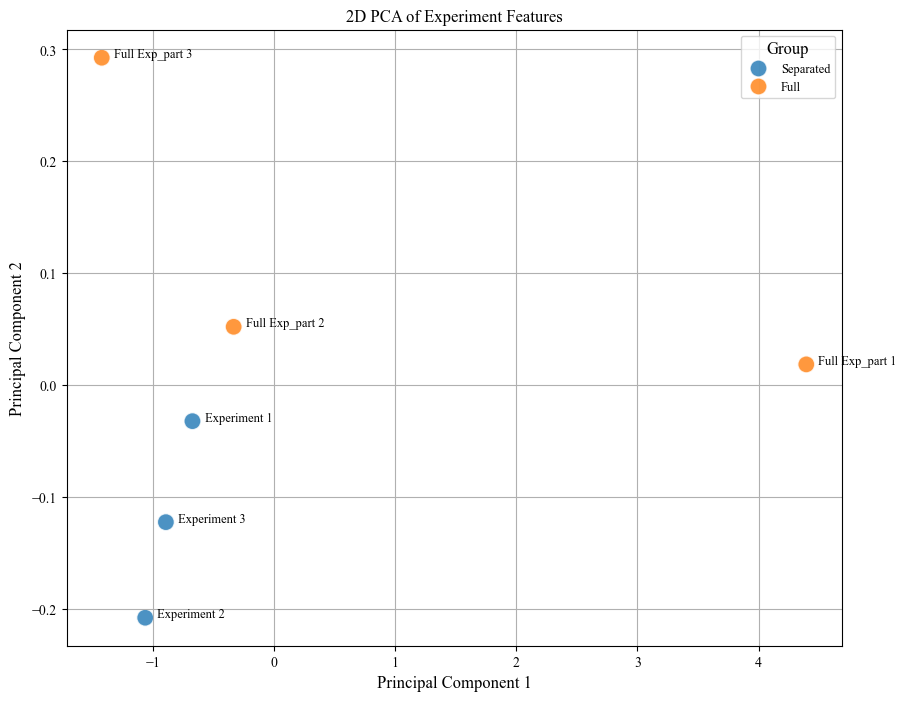

In [ ]:
# --- Main script ---

# Create a list to hold the features for each experiment
feature_list = []
all_segments = {}

# 1. Process Separated Experiments
files_only_one = {"Experiment 1": file_first, "Experiment 2": file_second, "Experiment 3": file_third}
for label, path in files_only_one.items():
    try:
        df = pd.read_csv(path, sep=';', on_bad_lines='skip')
        df.columns = [col.strip() for col in df.columns]
        for col in ['Time', 'Refractive Index']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        df.dropna(subset=['Time', 'Refractive Index'], inplace=True)
        segment = get_segment(df)
        if segment is not None:
            all_segments[label] = segment
    except Exception as e:
        print(f"Could not process file {path}. Error: {e}")

# 2. Process Corrected Experiments
try:
    df_tree = pd.read_csv(file_tree_corrected, sep=';', on_bad_lines='skip')
    df_tree.columns = [col.strip() for col in df_tree.columns]
    for col in ['Time', 'Refractive Index']:
        df_tree[col] = pd.to_numeric(df_tree[col], errors='coerce')
    df_tree.dropna(subset=['Time', 'Refractive Index'], inplace=True)
    
    split_indices = df_tree[df_tree['Comment'].str.lower().str.contains('biotin', na=False)].index.tolist()
    experiment_dfs = np.split(df_tree, split_indices[1:])
    
    for i, exp_df in enumerate(experiment_dfs, 1):
        label = f"Full Exp_part {i}"
        segment = get_segment(exp_df.copy())
        if segment is not None:
            all_segments[label] = segment
except Exception as e:
    print(f"Could not process corrected experiments. Error: {e}")

# 3. Extract Features and create a feature table
for label, segment in all_segments.items():
    # --- FIX IS HERE ---
    # Sort by time to ensure x-values are monotonic before calculating AUC
    segment = segment.sort_values(by='Normalized Time').drop_duplicates(subset=['Normalized Time'])
    
    features = {
        'Experiment': label,
        'Max Signal': segment['Normalized Refractive Index'].max(),
        'Mean Signal': segment['Normalized Refractive Index'].mean(),
        'Signal Std Dev': segment['Normalized Refractive Index'].std(),
        'Area Under Curve': auc(segment['Normalized Time'], segment['Normalized Refractive Index'])
    }
    feature_list.append(features)

feature_df = pd.DataFrame(feature_list)
print("--- Feature Table ---")
print(feature_df.to_markdown(index=False))

# 4. Perform PCA
# Separate features and labels
features_for_pca = feature_df.drop('Experiment', axis=1)
labels = feature_df['Experiment']

# Standardize the features
x = StandardScaler().fit_transform(features_for_pca)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])
final_df = pd.concat([principal_df, labels], axis=1)

# Add a 'Group' column for coloring the plot
final_df['Group'] = final_df['Experiment'].apply(lambda x: 'Full' if 'Full' in x else 'Separated')

# 5. Visualize PCA results
plt.figure(figsize=(10, 8),dpi=300)
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Group', data=final_df, s=150, alpha=0.8)

# Add labels to each point
for i, txt in enumerate(final_df.Experiment):
    plt.text(final_df['Principal Component 1'][i]+0.1, final_df['Principal Component 2'][i], txt, fontsize=9)

plt.title('2D PCA of Experiment Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.savefig('BiotinPlots/pca_classification.png')

print("\nPCA plot saved to pca_classification.png")
